2023/01/07 0520i

studying ai becuase I cant sleep

mimicing the professors code while trying to understand the most of it.(its not mimicing I added a bunch of feachers!)
I changed some variable name so that I can understand better


In [2]:
import torch
import torch.optim as optim
import matplotlib.pyplot as graph

print("Wellcome to SJ's Human Killing AI! ")
print("just kidding it doesnt kill anything... But! it makes a line for free!")
print("So! lets give it a try! how many DOTs are you going to put in?")
while(1):
  cnt = int(input())
  if cnt <= 1:
    print("Dont you know math? you need at least 2 dots to make a line! try again.")
  else:
    break

print("type in "+str(cnt)+" x data")
x_torch_data = torch.FloatTensor([[int(input())] for row in range(cnt)])#you input cnt numbers
print("type in "+str(cnt)+" y data")
y_torch_data = torch.FloatTensor([[int(input())] for row in range(cnt)])


#x_torch_data = torch.FloatTensor([[1],[2],[3]])
#y_torch_data = torch.FloatTensor([[7],[10],[13]])

"""#this is for checking
print(x_torch_data)
print(x_torch_data.shape)
print(y_torch_data)
print(y_torch_data.shape)

print("avr of x is %d",torch.mean(x_torch_data))
print("avr of y is %d",torch.mean(y_torch_data))
"""

x_avr = torch.mean(x_torch_data)
y_avr = torch.mean(y_torch_data)

x_torch_avr = torch.FloatTensor([[x_avr] for row in range(cnt)])
y_torch_avr = torch.FloatTensor([[y_avr] for row in range(cnt)])

x_data_avr = x_torch_data - x_torch_avr
y_data_avr = y_torch_data - y_torch_avr
"""
print(x_data_avr)
print(y_data_avr)
"""
#xy 
xy_torch = x_data_avr * y_data_avr

xy_sum = torch.sum(xy_torch)

#xx

xx_sum = torch.sum(torch.pow(x_data_avr,2))

W = xy_sum / xx_sum #which is the slope
b = y_avr - W * x_avr #which is the y intercept



print("result")

#graphs

graph.scatter(x_torch_data,y_torch_data,label = "input dots")
end_of_the_line_dot_x = max(x_torch_data).item() +1 #since idk how to make a infinate line, I have to make a long line depening how big is the max input is
graph.plot([1,end_of_the_line_dot_x],[W.item()*1+b,W.item()*end_of_the_line_dot_x+b.item()],label = " ai graph ")
graph.legend()
graph.show()
print("the slope is %.2f and the y intercept is %.2f"%(W.item(),b.item()))
print("Done!")


ModuleNotFoundError: No module named 'torch'

its hard to code with out the editors help... I have to download torch or sth....

In [ ]:

## REST TO 0
W = torch.zeros(1,requires_grad=True)#W is the slope #torch.zeros(num,num2) it shpaes the list
print(W)
b = torch.zeros(1,requires_grad=True)#b is the y intercept
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


this is the Gradian Decent graph! its Machine Lenaring (super cool) Enjoy 👍
Epoch    0/1000 W : 0.9720 b : 0.1320 Cost : 60.6000
Epoch  100/1000 W : 1.2906 b : -0.5736 Cost : 1.4300
Epoch  200/1000 W : 1.3680 b : -1.1081 Cost : 1.1343
Epoch  300/1000 W : 1.4242 b : -1.4961 Cost : 0.9785
Epoch  400/1000 W : 1.4650 b : -1.7779 Cost : 0.8964
Epoch  500/1000 W : 1.4947 b : -1.9824 Cost : 0.8531
Epoch  600/1000 W : 1.5162 b : -2.1309 Cost : 0.8303
Epoch  700/1000 W : 1.5318 b : -2.2387 Cost : 0.8183
Epoch  800/1000 W : 1.5431 b : -2.3170 Cost : 0.8119
Epoch  900/1000 W : 1.5514 b : -2.3738 Cost : 0.8086
Epoch 1000/1000 W : 1.5573 b : -2.4151 Cost : 0.8068


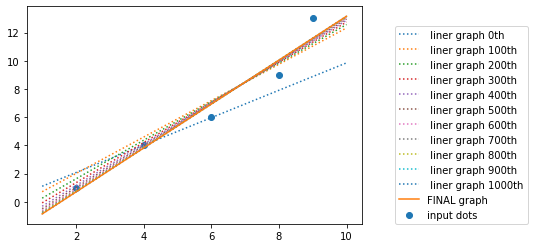

In [ ]:
print("this is the Gradian Decent graph! its Machine Lenaring (super cool) Enjoy 👍")

nb_epoch = 1000 #epoch means a big moment idk what nb stands for
for i in range(0,nb_epoch+1):
  hypothesis = x_torch_data * W + b # just like y = ax + b
  cost = torch.mean((hypothesis - y_torch_data)**2) # torch.mean returns the avrage value. just like sum/cnt
  #since the w (the slope) and the b (y intercept) is 0 so its basicly ^2 all the y and divide it by count
  optimizer = optim.SGD([W,b],lr = 0.01) # sgd =  Stochastic gradient descent // W := W - alpha*d/dw*cost(w) //  lr = leaning rate
  #optimizer.zero_grad()를 호출하여 모델 매개변수의 변화도를 재설정합니다. 기본적으로 변화도는 더해지기(add up) 때문에 중복 계산을 막기 위해 반복할 때마다 명시적으로 0으로 설정합니다.

  optimizer.zero_grad() # reset optimizer gradient to zero

  cost.backward() #calulate cost
  #loss.backwards()를 호출하여 예측 손실(prediction loss)을 역전파합니다. PyTorch는 각 매개변수에 대한 손실의 변화도를 저장합니다.
  optimizer.step() #지정한 optimizer의 step() 한수를 호출하여 신경망 파라메터를 업데이트한다.
  if i % (nb_epoch/10) == 0: # this is true 10 times
    print("Epoch %4d/%d W : %.4f b : %.4f Cost : %.4f"%(i,nb_epoch,W,b,cost))
    graph.plot([1,end_of_the_line_dot_x],[W.item() * 1 + b.item() , end_of_the_line_dot_x*W.item() + b.item()],':',label = " liner graph "+str(i)+"th")
graph.plot([1,end_of_the_line_dot_x],[W.item() * 1 + b.item() , end_of_the_line_dot_x*W.item() + b.item()],label = "FINAL graph")
graph.scatter(x_torch_data,y_torch_data,label = "input dots")
graph.legend(loc = (1.1,0)) #leagend(location coordinates)
graph.show()


things to learn more (very simplified) :

No 0.
tensor is a list


No 1.
pytorch is basicly nchw format
NCHW stands for : batch N, channels C, depth D, height H, width W

NCHW is a way to store multidimensional arrays / data frames / matrix into memory, which can be considered as a 1-D array.

No 2. torch.mean returns the avrage value

No 3. to turn torch to int you have to put .item()

No 4. to **2 the torch you can use torch.pow(original,num or torch)

Quadratic Function

showing the cost W line!


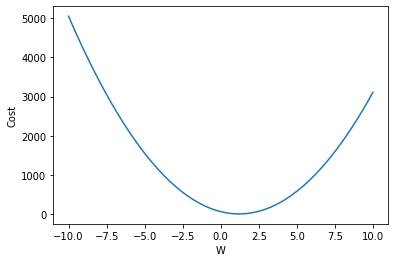

In [ ]:
x_list = [] #this is list of W
y_list = [] #this is list of COST

x1 = -10#start of x
x2 =  10 #end of x
howmany = 10000 #when this is big,the better the quality but it takes more time

def diviing_list(x1, x2, num, list):
    if x2 < x1:
        temp = x2
        x2 = x1
        x1 = temp
    list.append(x1)
    appendnum = x1
    for i in range(0, num):
        appendnum = (x2 - x1) / num + appendnum
        list.append(appendnum)
    #hypothesis = x_torch_data * W + b
    for x in list:
        y_list.append( torch.mean((x_torch_data * x - y_torch_data)**2).item())



diviing_list(x1, x2,howmany, x_list)
#print(x_list)
#print(y_list)
print("showing the cost W line!")
graph.plot(x_list,y_list)
graph.xlabel("W")
graph.ylabel("Cost")
graph.show()
